# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import pickle as pkl

# Import Dataset

In [2]:
powerplant = pd.read_csv('powerPlantData.csv')
powerplant

,temperature,vacuum,pressure,humidity,energy
0,23.25,71.29,1008.05,71.36,442.21
1,13.87,42.99,1007.45,81.52,471.12
2,16.91,43.96,1013.32,79.87,465.86
3,10.09,37.14,1012.99,72.59,473.66
4,12.72,40.60,1013.45,86.16,471.23
...,...,...,...,...,...
9563,28.27,66.56,1007.36,55.99,433.52
9564,21.89,58.62,1016.15,74.59,450.05
9565,3.20,41.31,997.67,98.84,489.86
9566,17.79,43.52,1020.65,68.29,458.57


#### GETTING THE FEATURES OF THE DATA

In [3]:
powerplant.describe

<bound method NDFrame.describe of       temperature  vacuum  pressure  humidity  energy
0           23.25   71.29   1008.05     71.36  442.21
1           13.87   42.99   1007.45     81.52  471.12
2           16.91   43.96   1013.32     79.87  465.86
3           10.09   37.14   1012.99     72.59  473.66
4           12.72   40.60   1013.45     86.16  471.23
...           ...     ...       ...       ...     ...
9563        28.27   66.56   1007.36     55.99  433.52
9564        21.89   58.62   1016.15     74.59  450.05
9565         3.20   41.31    997.67     98.84  489.86
9566        17.79   43.52   1020.65     68.29  458.57
9567        14.70   48.60   1006.91     85.65  460.63

[9568 rows x 5 columns]>

In [4]:
powerplant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  9568 non-null   float64
 1   vacuum       9568 non-null   float64
 2   pressure     9568 non-null   float64
 3   humidity     9568 non-null   float64
 4   energy       9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [5]:
features = ['temperature','vacuum','pressure','humidity']

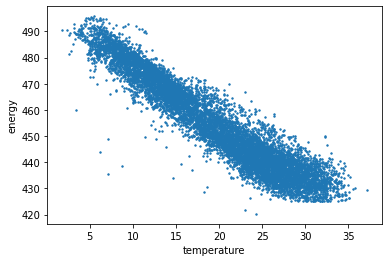

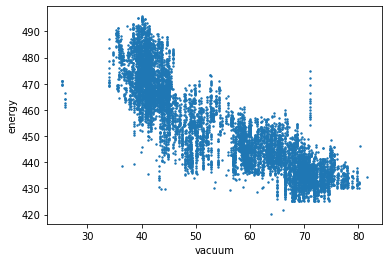

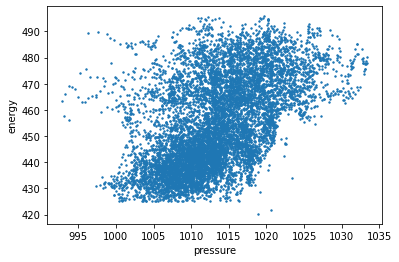

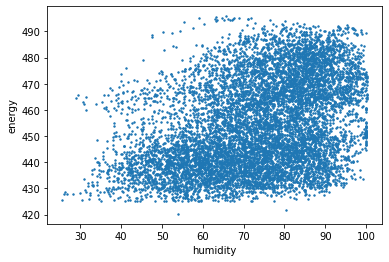

In [6]:
for feature in features:
    powerplant.plot.scatter(x = feature, y = 'energy' , s = 2)

# Define x and y

In [7]:
x = powerplant.drop(['energy'],axis = 1).values
y = powerplant['energy'].values

In [8]:
x

array([[  23.25,   71.29, 1008.05,   71.36],
       [  13.87,   42.99, 1007.45,   81.52],
       [  16.91,   43.96, 1013.32,   79.87],
       ...,
       [   3.2 ,   41.31,  997.67,   98.84],
       [  17.79,   43.52, 1020.65,   68.29],
       [  14.7 ,   48.6 , 1006.91,   85.65]])

In [9]:
y

array([442.21, 471.12, 465.86, ..., 489.86, 458.57, 460.63])

# Split the dataset into Train and Test Set

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size = 0.3)

#### Checking the splitted data

In [11]:
x_train

array([[  25.6 ,   58.46, 1016.34,   66.6 ],
       [  11.1 ,   40.  , 1021.29,   86.58],
       [  25.24,   63.47, 1011.3 ,   66.21],
       ...,
       [  28.68,   70.32, 1008.51,   45.73],
       [   5.17,   35.57, 1026.68,   79.86],
       [  10.11,   42.49, 1010.22,   82.11]])

In [12]:
y_train

array([441.88, 477.2 , 442.75, ..., 430.48, 491.32, 483.56])

In [13]:
x_test

array([[  13.87,   41.74, 1021.42,   64.02],
       [  26.36,   54.5 , 1015.35,   66.87],
       [  25.1 ,   74.87, 1010.01,   79.41],
       ...,
       [  18.9 ,   47.83, 1005.31,   77.79],
       [  13.81,   40.2 , 1013.66,   88.16],
       [  28.16,   70.72, 1009.81,   65.32]])

In [14]:
y_test

array([472.12, 451.81, 439.93, ..., 455.94, 464.23, 441.37])

# 

# Train the model on Train Data

In [15]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

# Predict the Model on Test Data

In [16]:
y_pred = model.predict(x_test)
y_pred

array([470.70640995, 442.14604001, 437.62082497, ..., 456.2327275 ,
       467.01240609, 434.68349759])

In [17]:
model.predict([[23.25,71.29,1008.05,71.36]])

array([443.25372452])

# Evaluate the Model

In [18]:
r2_score(y_test,y_pred)

0.9231249739333652

# Checking for what test size does it gives highest r2_score

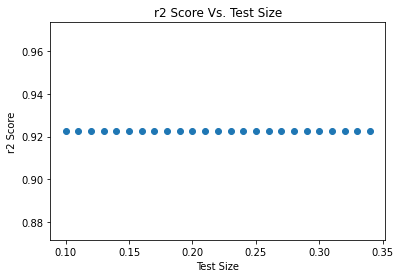

In [19]:
i = 0.10
points = []
scores = []
while i<=0.35:
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size = 0.05)
    model = LinearRegression()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    scores.append(r2_score(y_test,y_pred))
    points.append(i)
    i+=0.01
plt.scatter(x = points,y = scores)
plt.xlabel("Test Size")
plt.ylabel("r2 Score")
plt.title("r2 Score Vs. Test Size")
plt.show()

### Hence we can simply use any ratio as the data is very huge and any ML model would not be able to learn much more from this data after a certain threshold value

# Plot the results

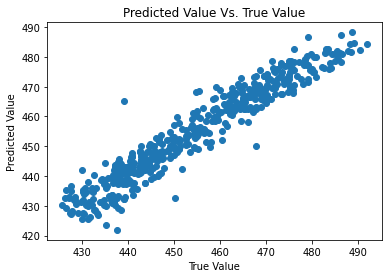

In [20]:
plt.scatter(y_test,y_pred)
plt.xlabel("True Value")
plt.ylabel("Predicted Value")
plt.title("Predicted Value Vs. True Value")
plt.show()

# SAVING THE MODEL FOR WEBSITE USE

In [21]:
## Get the parameters
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [22]:
print(model.coef_)
print(model.intercept_)

[-1.97953421 -0.23425375  0.06177314 -0.15973715]
455.1107802948871


In [23]:
model_data = model.intercept_
model_data = np.append(model.coef_,model_data)
model_data

array([-1.97953421e+00, -2.34253749e-01,  6.17731445e-02, -1.59737153e-01,
        4.55110780e+02])

In [24]:
# Changing the model_data upto two decimal places
model_data_dumy = []
for value in model_data:
    model_data_dumy.append(round(value,2))
model_data = np.array(model_data_dumy).T
model_data

array([-1.9800e+00, -2.3000e-01,  6.0000e-02, -1.6000e-01,  4.5511e+02])

In [25]:
test = [23.25,71.29,1008.05,71.36,1]

In [26]:
np.matmul(model_data.T,test)

441.7437

In [27]:
pkl.dump(model_data,open('model.pkl','wb'))

# Getting values for the slider on Website

In [36]:
from numpy import average

In [37]:
print(max(powerplant['temperature']) , min(powerplant['temperature']),average(powerplant['temperature']))

37.11 1.81 19.65123118729097


In [38]:
print(max(powerplant['vacuum']) , min(powerplant['vacuum']),average(powerplant['vacuum']))

81.56 25.36 54.30580372073578


In [39]:
print(max(powerplant['pressure']) , min(powerplant['pressure']),average(powerplant['pressure']))

1033.3 992.89 1013.2590781772576


In [40]:
print(max(powerplant['humidity']) , min(powerplant['humidity']),average(powerplant['humidity']))

100.16 25.56 73.30897784280936
